# Keras for the tweet sentiment

Dataset used to make a model is found here: 

https://www.kaggle.com/kazanova/sentiment140

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras import models, layers, optimizers, losses, metrics
# from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df = pd.read_csv('Tweet_sentiment_clean.csv', encoding='ISO-8859-1')

In [4]:
df.head()

,sentiment,text
0,0,user url aww that bummer shoulda got david car...
1,0,upset cant updat facebook text might cri resul...
2,0,user dive mani time ball manag save num rest g...
3,0,whole bodi feel itchi like fire
4,0,user behav im mad cant see


In [5]:
df['sentiment'].value_counts()

4    799789
0    799722
Name: sentiment, dtype: int64

In [6]:
for i in range(1, 6):
    print('Good: \t', df['text'].iloc[-i], '\n', 
         'Bad: \t', df['text'].iloc[i], '\n')

Good: 	 happi charitytuesday user user user 
 Bad: 	 upset cant updat facebook text might cri result school today also blah 

Good: 	 happi numth birthday boo time tupac amaru shakur 
 Bad: 	 user dive mani time ball manag save num rest go bound 

Good: 	 readi mojo makeov ask detail 
 Bad: 	 whole bodi feel itchi like fire 

Good: 	 thewdbcom cool hear old walt interview url 
 Bad: 	 user behav im mad cant see 

Good: 	 woke school best feel ever 
 Bad: 	 user whole crew 



In [7]:
# sample_size = 700000
# df1 = pd.concat([df.head(sample_size), df.tail(sample_size)])

In [8]:
X = df['text']
y = df['sentiment']

In [9]:
encoder = LabelEncoder()

y = encoder.fit_transform(y)

In [10]:
X_trainvalid, X_test, y_trainvalid, y_test = train_test_split(X, y, test_size=0.3)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainvalid, y_trainvalid, test_size=0.3)

print('Train data size: \t', X_train.shape[0], 
      '\nValidation data size: \t', X_valid.shape[0], 
      '\nTest data size: \t', X_test.shape[0])

test_fold = [0 if x in X_valid.index else -1 for x in X_trainvalid.index]

ps = PredefinedSplit(test_fold)

Train data size: 	 783759 
Validation data size: 	 335898 
Test data size: 	 479854


In [11]:
vector = TfidfVectorizer(max_features=5000)
X_train_v = vector.fit_transform(X_train)
X_valid_v = vector.transform(X_valid)
X_test_v = vector.transform(X_test)

In [12]:
print(X_train_v.shape)
print(X_test_v.shape)

(783759, 5000)
(479854, 5000)


In [13]:
print(y_train.shape)
print(y_test.shape)

(783759,)
(479854,)


In [14]:
X_train_v.shape[1]

5000

## Building and training model 

In [15]:
model = models.Sequential()
model.add(layers.Dense(16, activation= 'relu', input_shape = (X_train_v.shape[1], )))
model.add(layers.Dense(16, activation= 'relu'))
model.add(layers.Dense(1, activation= 'sigmoid'))

In [16]:
model.compile(optimizer = optimizers.RMSprop(lr=0.0003), 
             loss = losses.binary_crossentropy, 
             metrics = [metrics.binary_accuracy])

In [17]:
history = model.fit(X_train_v, y_train, 
                   epochs = 50, 
                   batch_size = 256, 
                   validation_data=(X_valid_v, y_valid),
#                     validation_split=0.3,
                   verbose = True)

Train on 783759 samples, validate on 335898 samples
Epoch 1/50
783759/783759 [==============================] - 80s 102us/step - loss: 0.5140 - binary_accuracy: 0.7580 - val_loss: 0.4767 - val_binary_accuracy: 0.7722
Epoch 2/50
783759/783759 [==============================] - 70s 90us/step - loss: 0.4718 - binary_accuracy: 0.7756 - val_loss: 0.4734 - val_binary_accuracy: 0.7735
Epoch 3/50
783759/783759 [==============================] - 70s 90us/step - loss: 0.4673 - binary_accuracy: 0.7775 - val_loss: 0.4705 - val_binary_accuracy: 0.7755
Epoch 4/50
783759/783759 [==============================] - 71s 90us/step - loss: 0.4647 - binary_accuracy: 0.7792 - val_loss: 0.4695 - val_binary_accuracy: 0.7761
Epoch 5/50
783759/783759 [==============================] - 71s 90us/step - loss: 0.4634 - binary_accuracy: 0.7803 - val_loss: 0.4691 - val_binary_accuracy: 0.7764
Epoch 6/50
783759/783759 [==============================] - 71s 90us/step - loss: 0.4625 - binary_accuracy: 0.7810 - val_loss: 

In [18]:
model.save('sentiment.h5')

For 200000 sample size: learning rate = 0.0003, batch size = 215, max_feature = 2000  accuracy crosses 77% 

For 700000 sample size: learning rate = 0.0003, batch size = 215, max_feature = 2000  accuracy crosses 77.2%  was improving

For 700000 sample size: learning rate = 0.0003, batch size = 215, max_feature = 5000  accuracy crosses 78%

For 700000 sample size: learning rate = 0.0003, batch size = 215, max_feature = 5000  accuracy crosses ?????

For 700000 sample size: learning rate = 0.0003 don't use smaller learnig rate than this 


# Training on a small batch is mutch solowe than training on the larger batch. This contradicts what others are saying. Is this strange?

- Use drop out layer 

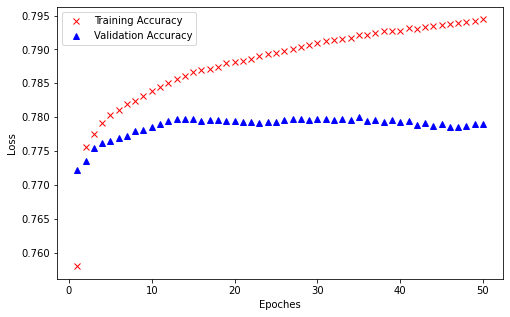

In [21]:
history_dict = history.history
epoches = range(1, 1 + 50)

acc_training = history_dict['binary_accuracy']
acc_validation = history_dict['val_binary_accuracy']

plt.figure(figsize=(8, 5))
plt.plot(epoches, acc_training, 'rx')
plt.plot(epoches, acc_validation, 'b^')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.show()

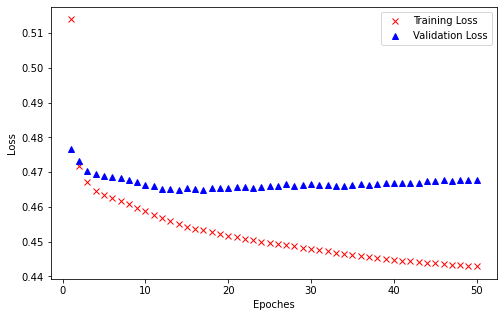

In [22]:
history_dict = history.history
epoches = range(1, 1 + 50)

loss_training = history_dict['loss']
loss_validation = history_dict['val_loss']

plt.figure(figsize=(8, 5))
plt.plot(epoches, loss_training, 'rx')
plt.plot(epoches, loss_validation, 'b^')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.show()

# Further analysis 

In [15]:
from tensorflow.keras.models import load_model

In [16]:
model_1 = load_model('sentiment.h5')

In [17]:
confidence = model_1.predict(X_valid_v.todense())

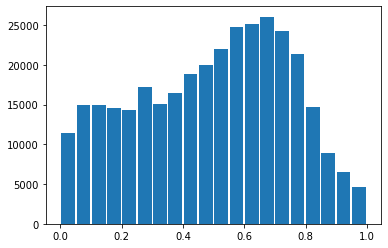

In [18]:
plt.hist(confidence, bins=20, rwidth=0.9)
plt.show()

In [55]:
# X_test_v.todense()

In [21]:
results = model_1.evaluate(X_test_v.todense(), y_test)

479854/479854 [==============================] - 202s 422us/sample - loss: 0.8068 - binary_accuracy: 0.5449


In [22]:
results

[0.8068312919842368, 0.54494286]

- There is something wrong with converting to todense(). 

# Train neural network on Simple matrix

- No tfidf 

- Try ensemble on movie review data?